
# Computational Statistics 
# TP 1 : Reminder on Markov Chains – Stochastic gradient descent




**Question 1**



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import array

In [5]:
def stochastic_gradient(X, Y, w0, N, alpha=1):
  """
  X, Y : liste des observations
  w0 : notre vecteur initial
  N : nombre d'iteration de l'algorithme
  On choisi notre suite epsilon = 1/k**alpha avec alpha=1 par defaut
  """
  w_bis = w0
  n = len(Y)
  for k in range(1, N+1):
    i = np.random.randint(0, n) # Tire un nombre aléatoirement entre 0 et n-1
    gradient = -2 * (Y[i] - dot(X[i,:], w_bis)) * X[i,:]
    wk = w_bis - (1/k**alpha) * gradient
    w_bis = wk
    k+=1
  return wk

**Question 2**


In [6]:
def sample_x(n):
  #Genere un echantillon des xi de taille n sur la boule unite (qui implique une convergence car le gradient est borne) 
  return np.array(np.random.uniform(-1,1, size=(500,2)))

def sample_w():
  #Genere un vecteur normal aleatoirement pour un hyperplan
  w = np.array(np.random.uniform(-1,1,size=2))
  return w/np.linalg.norm(w)

def sample_z(n, w):
  #Genere un echantillon de z = (x, y) de taille n
  Z = []
  x = sample_x(n)
  for k in range(n):
    y = np.dot(x[k,:], w)
    Z.append([x[k,:], y])
  return Z

def graph(Z,w, xlim1=-1.1, xlim2=1.1, ylim1=-1.1, ylim2=1.1, bruit=False, legend=True):
  #Permet de tracer notre resultat
  n = len(Z)
  x=[]
  y=[]
  for k in range(n):
    x.append(Z[k][0][0])
    y.append(Z[k][0][1])

  plt.figure(figsize=(10,7))

  colors = ['red' if Z[k][1] > 0 else 'green' for k in range(n)] # Associe une couleure pour chaque la
  plt.scatter(x, y, c=colors) ## The observations 

  if bruit==True: #Utile pour question 4
    a=np.linspace(-2,2,500)
    plt.plot(a,-(w[0]/w[1])*a, color='black', lw=3, linestyle='--')
  else:
    droite = (1.2 / (w[0]**2 + w[1]**2))**0.5 * np.array((-w[1], w[0])) 
    plt.plot([-droite[0], droite[0]], [-droite[1], droite[1]], color='black', linestyle='--', lw=3)[0] # On trace la droite separant les differents labels

  if legend==True:
    plt.title("En rouge y=1 et en vert y=-1" , fontsize = 14)
  
  plt.xlim((xlim1,xlim2))
  plt.ylim((ylim1,ylim2))
  plt.show()

**Exemple pour n = 200**

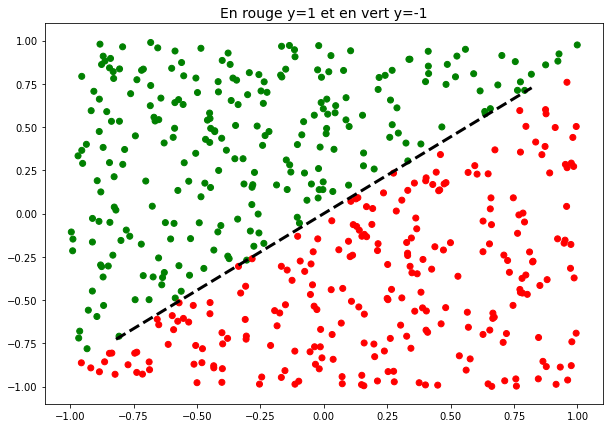

In [139]:
#On génére une collection de 500 observations ainsi qu'un vecteur normal w d'un hyperplan
n = 500
w = sample_w()
Z = sample_z(n,w)
graph(Z,w)

**Question 3**

L'idée maintenant est d'approcher le vecteur normal w grâce à la méthode de la descente du gradient stochastique et de pouvoir comparer si l'algorithme a été performant ou non.

In [123]:
def performance(X,Y,w):
  #Cette fonction performance nous permet d'evaluer le pourcentage de reussite de l'algorithme
  Y = sign(Y)
  n = len(Y)
  succes = 0
  for i in range(n): 
    if sign(Y[i]) == sign(dot(X[i,:],w)): 
      succes += 1
  return (succes/n*100)

In [140]:
#On creer un tableau numpy pour les observations xi et yi
X = np.array((Z[0][0][0], Z[0][0][1]))

for k in range(1, n):
  X = np.vstack([X,[Z[k][0][0],Z[0][0][1]]])

Y = np.dot(X,w)

#On prend aleatoirement notre vecteur initial pour la descente du gradient stochastique 
w0 = sample_w()

#On initialise à 700 iterations
N = 700

w_gradient = stochastic_gradient(X, Y, w0, N)
#On normalise le vecteur pour pouvoir évaluer la performance de l'algorithme
w_gradient = w_gradient / np.linalg.norm(w_gradient)

print("Le vecteur normal issu des donnees est : ", w)
print("Le vecteur normal estimé w* = ", w_gradient)
print("L'ecart ou l'erreur entre les deux vecteurs est de : ", np.linalg.norm(w-w_gradient))
print("Le taux de reussite de l'algorithme est de : ", performance(X,Y,w_gradient), "%")



Le vecteur normal issu des donnees est :  [ 0.66369382 -0.74800436]
Le vecteur normal estimé w* =  [ 0.62982745 -0.77673508]
L'ecart ou l'erreur entre les deux vecteurs est de :  0.04441153809260878
Le taux de reussite de l'algorithme est de :  100.0 %


L'algorithme de descente du gradient stochastique est performant dans notre cas car il est très proche du vecteur normal à estimer (l'erreur est faible) et a un bon taux de réussite pour estimer les labels.

**Question 4**

In [141]:
#On initialise un bruit gaussien totalement aleatoire
bruit = 0.4 * np.random.normal(0,1,size=(n,2))
X_bruit = X + bruit



w0 = np.array(np.random.uniform(-1,1,size=2))
w0 = w0/np.linalg.norm(w0)

w_gradient_bruit = stochastic_gradient(X_bruit, Y, w0, N) 
w_gradient_bruit = w_gradient_bruit/np.linalg.norm(w_gradient_bruit)


Y_bruit = np.dot(X_bruit, w_gradient_bruit)


print("Le vecteur normal issu des donnees est : ", w)
print("Le vecteur normal estimé w* = ", w_gradient_bruit)
print("L'ecart ou l'erreur entre les deux vecteurs est de : ", np.linalg.norm(w - w_gradient_bruit))
print("Le taux de reussite de l'algorithme est de : ", performance(X_bruit, Y, w_gradient_bruit), "%")



Le vecteur normal issu des donnees est :  [ 0.66369382 -0.74800436]
Le vecteur normal estimé w* =  [ 0.62275017 -0.78242074]
L'ecart ou l'erreur entre les deux vecteurs est de :  0.05348709624520736
Le taux de reussite de l'algorithme est de :  92.0 %


On remarque que notre estimation est moins bonne avec du bruit que précèdemment avec un écart du taux de reussite notable d'environ 8 à 10%. On peut tracer le graphique similaire à la question 2 pour comparer les performances :

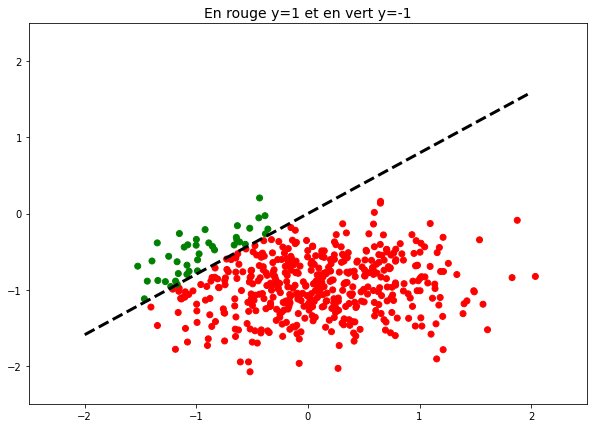

In [142]:
Z_bruit = []
for k in range(n):
  Z_bruit.append([X_bruit[k,:], Y_bruit[k]])
graph(Z_bruit,w_gradient_bruit, -2.5, 2.5, -2.5, 2.5, bruit=True)

**Question 5**

In [2]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import pandas as pd

In [92]:
#On importe l'ensemble de données au format csv
df = pd.read_csv('sample_data/breast-cancer-wisconsin.data', sep = ',', header = None, na_values='?')

#On remplace les valeurs ? par 0
df = df.fillna(0)

X = np.array(df[df.columns[:10]].values)
Y = np.array(np.where(df[10]==4,1,-1))

#On normalise nos données
s = preprocessing.StandardScaler()
X = s.fit_transform(X)

#on ne peut pas utiliser notre fonction sample_w car on est plus dans R^2
w = np.array(np.random.uniform(-1,1,size=X.shape[1])) 
w = w/np.linalg.norm(w)

w_gradient = stochastic_gradient(X, Y, w, 500)

In [93]:
print("Le vecteur normal issu des donnees est : w = ", w)
print("Le vecteur normal estimé est w* = ", w_gradient)
print("Le taux de reussite de l'algorithme est de : ", performance(X, Y, w_gradient), "%")

Le vecteur normal issu des donnees est : w =  [-0.26660721  0.4205747  -0.02876423  0.10686799 -0.39213633  0.39008646
  0.35500701  0.34010562  0.20464162  0.38764807]
Le vecteur normal estimé est w* =  [ 1.57118512 -0.73484727  0.63322379  1.54405241 -0.83981118 -1.11291829
  1.21761006 -0.12960775 -0.15797188  0.18896266]
Le taux de reussite de l'algorithme est de :  71.67381974248927 %


Si on trace un graphique comme précèdemment, on voit nettement la baisse d'efficacité de l'algorithme mais ceci est normal car les données ne sont jamais "parfaites". Cependant, 71% reste un bon taux de réussite.

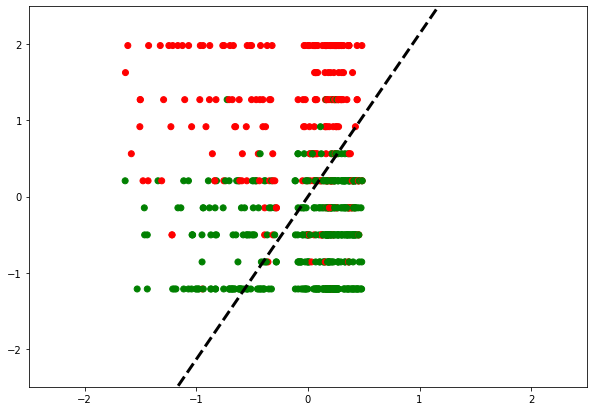

In [94]:
Z_data = []
for k in range(len(Y)):
  Z_data.append([X[k,:], Y[k]])
graph(Z_data,w_gradient, -2.5, 2.5, -2.5, 2.5, bruit=True, legend=False)

In [143]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [155]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!cp "/content/drive/MyDrive/Colab Notebooks/TP1_MARCIANO_MATHIAS.ipynb" ./
!jupyter nbconvert --to pdf TP1_MARCIANO_MATHIAS.ipynb

Mounted at /content/drive
[NbConvertApp] Converting notebook TP1_MARCIANO_MATHIAS.ipynb to pdf
[NbConvertApp] Support files will be in TP1_MARCIANO_MATHIAS_files/
[NbConvertApp] Making directory ./TP1_MARCIANO_MATHIAS_files
[NbConvertApp] Making directory ./TP1_MARCIANO_MATHIAS_files
[NbConvertApp] Making directory ./TP1_MARCIANO_MATHIAS_files
[NbConvertApp] Writing 73910 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 226540 bytes to TP1_MARCIANO_MATHIAS.pdf
